# DCNN Method
By Raniera Te Moni
raniera.temoni@connect.qut.edu.au
n10083057

For the Aerial Semantic Segmentation Drone Dataset, this notebook will detail the DCNN method used.   

Dataset Overview  
The Semantic Drone Dataset focuses on semantic understanding of urban scenes for increasing the safety of autonomous drone flight and landing procedures. The imagery depicts more than 20 houses from nadir (bird's eye) view acquired at an altitude of 5 to 30 meters above ground. A high resolution camera was used to acquire images at a size of 6000x4000px (24Mpx). The training set contains 400 publicly available images and the test set is made up of 200 private images.    

SEMANTIC SEGMENTATION  
We prepared pixel-accurate annotation for the same training and test set. The complexity of the dataset is limited to 20 classes as listed in the following table.  

Table 1: Semanic classes of the Drone Dataset  

tree, gras, other vegetation, dirt, gravel, rocks, water, paved area, pool, person, dog, car, bicycle, roof, wall, fence, fence-pole, window, door, obstacle

### 00 - Research

briefly describe a small number of relevant existing approaches,
their respective strengths/weaknesses and relation to each other (i.e. does one
build upon another), and the objective of your work

1. Fully Convolutional Networks (FCN): Fully Convolutional Networks (FCN) by Jonathan Long, Evan Shelhamer, and Trevor Darrell (2015).  
   
FCN is one of the pioneering models for semantic image segmentation. It replaces the fully connected layers of traditional convolutional neural networks (CNNs) with convolutional layers, enabling end-to-end pixel-wise predictions. FCN performs well in capturing fine-grained details but struggles with preserving spatial information due to pooling layers that reduce spatial resolution.

2. SegNet: SegNet: A Deep Convolutional Encoder-Decoder Architecture for Image Segmentation by Vijay Badrinarayanan, Alex Kendall, and Roberto Cipolla (2017).  

SegNet addresses the spatial information loss in FCN. It introduces an encoder-decoder architecture with skip connections. The encoder extracts features at multiple scales, while the decoder upsamples the features and fuses them with skip connections to recover spatial details. SegNet performs well in preserving boundaries but may produce fragmented segmentations due to the coarse decoding process.

3. U-Net: U-Net: Convolutional Networks for Biomedical Image Segmentation by Olaf Ronneberger, Philipp Fischer, and Thomas Brox (2015). 
   
U-Net is widely used in medical image segmentation. It features a U-shaped architecture with a contracting path (encoder) and an expanding path (decoder). Skip connections are employed to combine low-level and high-level features, aiding in accurate localization and segmentation. U-Net is effective for small dataset scenarios but may struggle with handling large variations in scale and shape.

4. DeepLab: DeepLab: Semantic Image Segmentation with Deep Convolutional Nets, Atrous Convolution, and Fully Connected CRFs by Liang-Chieh Chen, George Papandreou, Iasonas Kokkinos, Kevin Murphy, and Alan L. Yuille (2017). 
   
DeepLab employs atrous (dilated) convolutions to capture multi-scale contextual information while preserving spatial resolution. It utilizes dilated convolutions at different rates to capture various scales of context. DeepLab achieves accurate boundaries and handles varying object sizes, but it may introduce aliasing artifacts due to dilated convolutions.

5. PSPNet: Pyramid Scene Parsing Network by Hengshuang Zhao, Jianping Shi, Xiaojuan Qi, Xiaogang Wang, and Jiaya Jia (2017). 

PSPNet employs a pyramid pooling module to capture multi-scale contextual information effectively. It partitions the input image into regions and applies pooling operations at different scales, then fuses the features to generate a global representation. PSPNet performs well in capturing contextual information but may struggle with object details and small-scale segmentation.

6. Mask R-CNN: Mask R-CNN by Kaiming He, Georgia Gkioxari, Piotr Dollar, and Ross Girshick (2017). 

Mask R-CNN combines the object detection capabilities of the Faster R-CNN model with an additional segmentation branch. It identifies object proposals and performs instance segmentation by generating a binary mask for each proposal. Mask R-CNN is versatile for object detection and segmentation tasks but may be computationally expensive and requires significant training data.

7. HRNet: High-Resolution Representations for Labeling Pixels and Regions by Jingdong Wang, Ke Sun, Tianheng Cheng, Borui Jiang, Chaorui Deng, Yang Zhao, Dong Liu, Yadong Mu, Mingkui Tan, Xinggang Wang, Wenyu Liu, and Bin Xiao (2019). 

HRNet addresses the challenge of capturing both fine-grained details and global context simultaneously. It adopts a multi-resolution fusion strategy that maintains high-resolution representations throughout the network, enabling detailed and accurate segmentation. HRNet performs well in capturing both small and large objects but may be memory-intensive and computationally demanding.

8. DeepLabv3+: Encoder-Decoder with Atrous Separable Convolution for Semantic Image Segmentation by Liang-Chieh Chen, Yukun Zhu, George Papandreou, Florian Schroff, and Hartwig Adam (2018). DeepLabv3+ builds upon the DeepLab architecture by incorporating atrous separable convolutions in the encoder-decoder structure. This design allows for efficient multi-scale feature integration while maintaining spatial resolution. DeepLabv3+ achieves state-of-the-art performance in semantic image segmentation, particularly in capturing fine details and handling objects at different scales.

9. Attention U-Net: Learning Where to Look for the Pancreas by Ozan Oktay, Jo Schlemper, Loic Le Folgoc, Matthew Lee, Mattias Heinrich, Kazunari Misawa, Kensaku Mori, Steven McDonagh, Nils Y. Hammerla, Bernhard Kainz, Ben Glocker, and Daniel Rueckert (2018). Attention U-Net introduces an attention mechanism to the U-Net architecture, enhancing its ability to focus on informative image regions. The attention module learns to assign importance weights to different feature maps, enabling the network to selectively attend to relevant image areas. Attention U-Net achieves improved segmentation accuracy by effectively capturing relevant contextual information.

10. BiSeNet: Bilateral Segmentation Network for Real-time Semantic Segmentation by Changqian Yu, Jingbo Wang, Chao Peng, Changxin Gao, Gang Yu, and Nong Sang (2018). BiSeNet proposes a two-branch network architecture for real-time semantic segmentation. It consists of a context path and a spatial path, which are designed to capture both global contextual information and fine spatial details. The context path utilizes a lightweight network to encode global context efficiently, while the spatial path maintains high-resolution features for precise localization. BiSeNet achieves a good balance between accuracy and efficiency, making it suitable for real-time applications.

### 00 - Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re
import cv2
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import random
import scipy
from sklearn.model_selection import train_test_split

### 01 - Load the images

In [2]:
rgb_images_dir = "C:/Github/aerial-semantic-segmentation/dataset_here/dataset/semantic_drone_dataset/original_images"
bw_images_dir = "C:/Github/aerial-semantic-segmentation/dataset_here/dataset/semantic_drone_dataset/label_images_semantic"
color_masks_dir = "C:/Github/aerial-semantic-segmentation/dataset_here/RGB_color_image_masks/RGB_color_image_masks"
csv_file = "C:/Github/aerial-semantic-segmentation/dataset_here/class_dict_seg.csv"

In [3]:
def load_data():
    rgb_images = []
    rgb_images_names = []
    bw_images = []
    bw_images_names = []
    color_masks = []
    color_masks_names = []

    # Load RGB images
    for image_name in sorted(os.listdir(rgb_images_dir)):
        image_path = os.path.join(rgb_images_dir, image_name)
        if image_name.lower().endswith('.jpg') or image_name.lower().endswith('.jpeg'):
            label = os.path.splitext(image_name)[0]
            rgb_images.append(image_path)
            rgb_images_names.append(label)

    # Load black and white images
    for image_name in sorted(os.listdir(bw_images_dir)):
        image_path = os.path.join(bw_images_dir, image_name)
        if image_name.lower().endswith('.png'):
            label = os.path.splitext(image_name)[0]
            bw_images.append(image_path)
            bw_images_names.append(label)

    # Load color masks
    for image_name in sorted(os.listdir(color_masks_dir)):
        image_path = os.path.join(color_masks_dir, image_name)
        if image_name.lower().endswith('.png'):
            label = os.path.splitext(image_name)[0]
            color_masks.append(image_path)
            color_masks_names.append(label)

    return rgb_images, bw_images, color_masks

# Call the function to load the data
rgb_images, bw_images, color_masks = load_data()

# Print the number of images loaded
print("Number of RGB images loaded:", len(rgb_images))
print("Number of black and white images loaded:", len(bw_images))
print("Number of color masks loaded:", len(color_masks))

Number of RGB images loaded: 400
Number of black and white images loaded: 400
Number of color masks loaded: 400


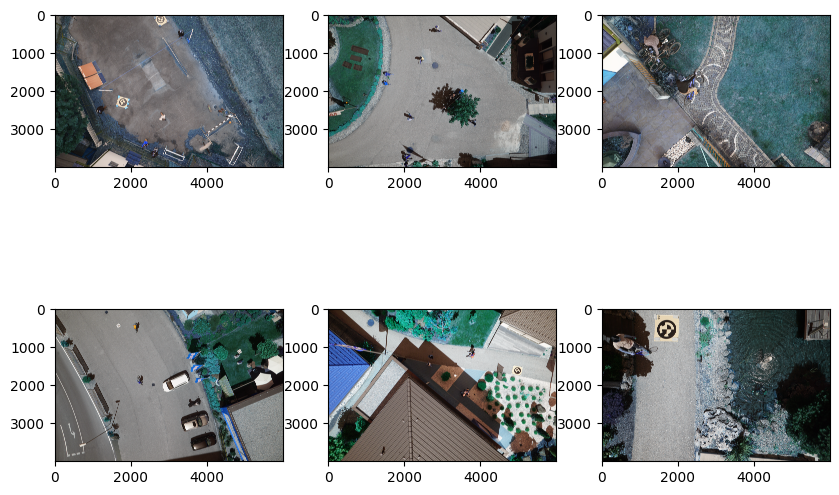

In [4]:
# Visualise some of the images from the dataset
fig = plt.figure(figsize=(10, 7))
columns = 3
rows = 2
for i in range(1, columns*rows +1):
    img = cv2.imread(rgb_images[i])
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

### 02 - Split the data into training and testing sets

In [12]:
# Step 2: Prepare the training data
input_images = rgb_images  # Use RGB images as input
output_masks = color_masks  # Use color masks as output

# Step 3: Split the data
train_ratio = 0.7
val_ratio = 0.2
test_ratio = 0.1

# Split into train and test sets
train_images, test_images, train_masks, test_masks = train_test_split(input_images, output_masks, test_size=test_ratio, random_state=42)

# Further split train set into train and validation sets
train_images, val_images, train_masks, val_masks = train_test_split(train_images, train_masks, test_size=val_ratio/(train_ratio+val_ratio), random_state=42)

# Print the number of images and masks
print("Number of train images:", len(train_images))
print("Number of train masks:", len(train_masks))
print("Number of val images:", len(val_images))
print("Number of val masks:", len(val_masks))
print("Number of test images:", len(test_images))
print("Number of test masks:", len(test_masks))

# get the dimensions of test_masks[1]
print("Dimensions of test_masks[1]:", cv2.imread(test_masks[1]).shape)
print("Dimensions of train_images[1]:", cv2.imread(train_images[1]).shape)

Number of train images: 279
Number of train masks: 279
Number of val images: 81
Number of val masks: 81
Number of test images: 40
Number of test masks: 40
Dimensions of test_masks[1]: (4000, 6000, 3)
Dimensions of train_images[1]: (4000, 6000, 3)


### 03 - Build DCNN Model: "DeepLab"

In [23]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import DepthwiseConv2D, Conv2D, AveragePooling2D, Flatten, Dense, InputLayer

# Define the model
def make_mobilenet(input_shape):
    model = Sequential()
    
    # Input layer
    model.add(InputLayer(input_shape=input_shape))
    
    # 1st Conv block
    model.add(Conv2D(32, kernel_size=(3, 3), strides=(2, 2), padding='same', activation='relu'))
    model.add(DepthwiseConv2D(kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'))
    model.add(Conv2D(64, kernel_size=(1, 1), strides=(1, 1), padding='same', activation='relu'))

    # Repeat Depthwise Conv + Conv blocks
    for _ in range(1):
        model.add(DepthwiseConv2D(kernel_size=(3, 3), strides=(2, 2), padding='same', activation='relu'))
        model.add(Conv2D(128, kernel_size=(1, 1), strides=(1, 1), padding='same', activation='relu'))
    
    for _ in range(2):
        model.add(DepthwiseConv2D(kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'))
        model.add(Conv2D(128, kernel_size=(1, 1), strides=(1, 1), padding='same', activation='relu'))
        
    for _ in range(2):
        model.add(DepthwiseConv2D(kernel_size=(3, 3), strides=(2, 2), padding='same', activation='relu'))
        model.add(Conv2D(256, kernel_size=(1, 1), strides=(1, 1), padding='same', activation='relu'))
        
    for _ in range(2):
        model.add(DepthwiseConv2D(kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'))
        model.add(Conv2D(256, kernel_size=(1, 1), strides=(1, 1), padding='same', activation='relu'))
        
    for _ in range(6):
        model.add(DepthwiseConv2D(kernel_size=(3, 3), strides=(2, 2), padding='same', activation='relu'))
        model.add(Conv2D(512, kernel_size=(1, 1), strides=(1, 1), padding='same', activation='relu'))
        
    # Last Conv block
    model.add(DepthwiseConv2D(kernel_size=(3, 3), strides=(2, 2), padding='same', activation='relu'))
    model.add(Conv2D(1024, kernel_size=(1, 1), strides=(1, 1), padding='same', activation='relu'))
    
    model.add(DepthwiseConv2D(kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'))
    model.add(Conv2D(1024, kernel_size=(1, 1), strides=(1, 1), padding='same', activation='relu'))
    
    # Output layer
    model.add(AveragePooling2D(pool_size=(7, 7)))
    model.add(Flatten())
    model.add(Dense(25, activation='softmax'))  # Assuming 25 classes

    return model

# Create the model
model = make_mobilenet((4000, 6000, 3))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(train_images, train_masks, epochs=10, validation_data=(val_images, val_masks))

# Test the model
score = model.evaluate(test_images, test_masks, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


ValueError: Exception encountered when calling layer "average_pooling2d" (type AveragePooling2D).

Negative dimension size caused by subtracting 7 from 2 for '{{node average_pooling2d/AvgPool}} = AvgPool[T=DT_FLOAT, data_format="NHWC", ksize=[1, 7, 7, 1], padding="VALID", strides=[1, 7, 7, 1]](Placeholder)' with input shapes: [?,2,3,1024].

Call arguments received by layer "average_pooling2d" (type AveragePooling2D):
  • inputs=tf.Tensor(shape=(None, 2, 3, 1024), dtype=float32)

In [ ]:



# Train the model
model.fit(train_images, train_masks, epochs=10, validation_data=(val_images, val_masks))

# Test the model
score = model.evaluate(test_images, test_masks, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [22]:
# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras.applications import MobileNetV2
# from tensorflow.keras.layers import Conv2D, UpSampling2D, Reshape
# from tensorflow.keras.losses import SparseCategoricalCrossentropy
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.metrics import MeanIoU

# # Base model
# # base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=[400, 600, 3])
# base_model = MobileNetV2(weights=None, include_top=False, input_shape=[400, 600, 3]) #, alpha=1.0, depth_multiplier=1)
# base_model.load_weights('mobilenet_1_0_224_tf.h5') # give the path for downloaded weights


In [ ]:

# weights downloaded from https://github.com/fchollet/deep-learning-models/releases/tag/v0.6
# highest performing weight = mobilenet_1_0_224_tf.h5

# Define the number of classes in the segmentation task
num_classes = 25  # Please update this to match your dataset

# Adding last few layers to match the number of segmentation classes
model = keras.Sequential()
model.add(base_model)

# Convolutional layer to create a feature map with the correct number of classes
model.add(Conv2D(num_classes, (1, 1)))

# Use a softmax activation on the feature maps
model.add(keras.layers.Activation('softmax'))

# Now, we need to define a custom layer that will resize the output back to original image size
class ResizeLayer(keras.layers.Layer):
    def __init__(self, new_size):
        super(ResizeLayer, self).__init__()
        self.new_size = new_size

    def call(self, inputs):
        return tf.image.resize(inputs, self.new_size)

# Use the resize layer
model.add(ResizeLayer((400, 600)))

# Flatten layer to get a 2D array with one row per pixel and one column per class
model.add(Reshape((400 * 600, num_classes)))

# compile the model
model.compile(optimizer=Adam(),
              loss=SparseCategoricalCrossentropy(from_logits=False), # change from_logits to False since we've already applied softmax
              metrics=[MeanIoU(num_classes)])

# Train the model
model.fit(train_images, train_masks, epochs=10, validation_data=(val_images, val_masks))

# Test the model
score = model.evaluate(test_images, test_masks, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])